# Data Science Internship @LetsGrowMore

# Task-3: Iris classification using DecisionTreeClassifier

The Iris dataset is a classic dataset for classification, machine learning, and data visualization.

The dataset contains: 3 classes (different Iris species) with 50 samples each, and then four numeric properties about those classes: Sepal Length, Sepal Width, Petal Length, and Petal Width.

One species, Iris Setosa, is "linearly separable" from the other two. This means that we can draw a line (or a hyperplane in higher-dimensional spaces) between Iris Setosa samples and samples corresponding to the other two species.

Predicted Attribute: Different Species of Iris plant.

This Project is thorugh application of machine learning with python programming. It focuses on IRIS flower classification using Machine Learning with scikit tools. Here some of algorithm are used that are some types of machine learning subparts algorithms of supervised and Unsupervised learning. Algorithm used for predicting and get accuracy is **Decision tree classifier**
We are making accuracy and prediction in Iris project through Iris Dataset. This is easy and understable for machine learning staters( Naive ).

Following are the steps which are required to complete this task
* Importing the neccesary libraries
* Loading and reading the data
* Exploratory Data Analysis, Cleaning the data i.e removing the unneccessary data
* Removing the outliers from the dataset
* Splitting and modelling the data
* Predicting the test data and comparing it with the original test data
* Evaluation of the model

### Importing the libraries

In [1]:
#Importing the neccessary tools and libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Reading the data

In [2]:
#loading and reading the data
df = pd.read_csv("Iris.csv")
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
#lets look at the missing values if present
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As we can see that there are no missing values in the dataset

The species contains three classes of different flowers so let us see their how much values are present in each class

In [4]:
#datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

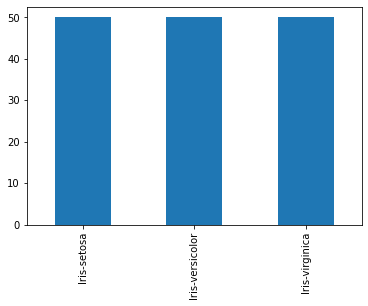

In [6]:
df["Species"].value_counts().plot.bar()

There are 3 classes of flowers with 50 values of each class , and this is our target variable that means with other features present we have to predict the Species 

Lets remove the 'ID' column first as it has no contribution for predicting our target variable

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.head(10)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa

In [9]:
#lets display some stats about the data
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

## Exploratory Data Analysis

### Univariate Analysis

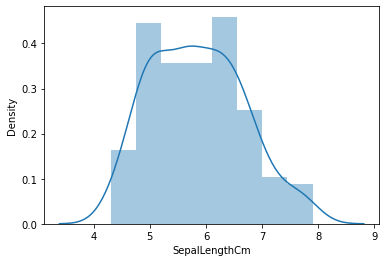

In [10]:
import warnings
warnings.filterwarnings("ignore")
#sepallengthcm
sns.distplot(df['SepalLengthCm']);

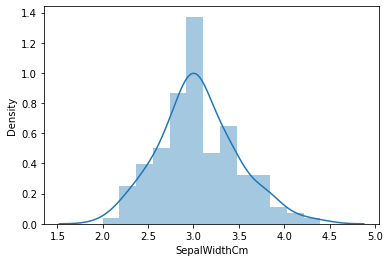

In [11]:
sns.distplot(df["SepalWidthCm"]);

We can see that this feature represents the gaussian distribution curve

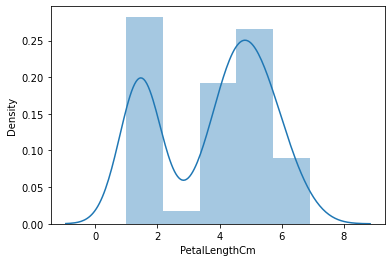

In [12]:
sns.distplot(df["PetalLengthCm"]);

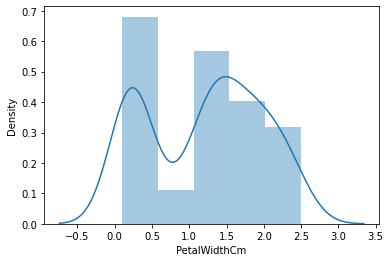

In [13]:
sns.distplot(df["PetalWidthCm"]);

### Multivariate Analysis

Text(0, 0.5, 'SepalWidth')

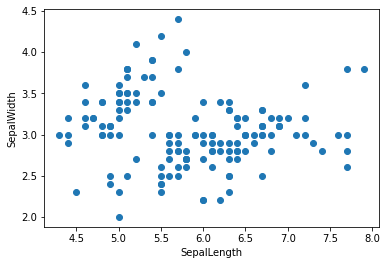

In [14]:
#scatter plot for sepal length vs width
sc = plt.scatter(x=df['SepalLengthCm'], y=df['SepalWidthCm'])
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

Text(0, 0.5, 'PetalWidth')

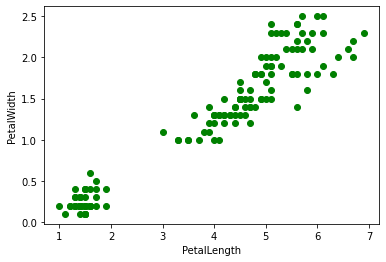

In [15]:
sc = plt.scatter(x=df['PetalLengthCm'], y=df['PetalWidthCm'], color="green")
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

From these above graphs we actually can't infer the three differnt classes of flowers
So let us visualize all the three classes wih different colours for all the features

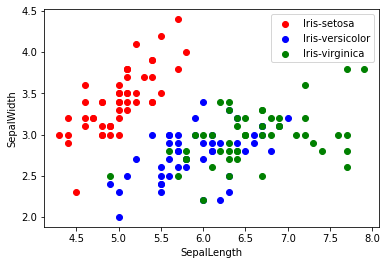

In [16]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'blue', 'green']

for i in range(3):
    x = df[df.Species == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

We can do the visual analysis of all the features of width and length in the same way

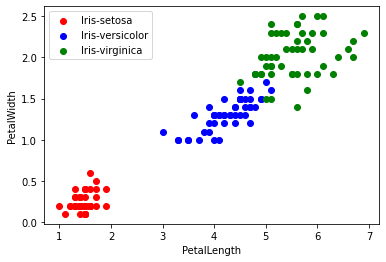

In [17]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'blue', 'green']

for i in range(3):
    x = df[df.Species == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()

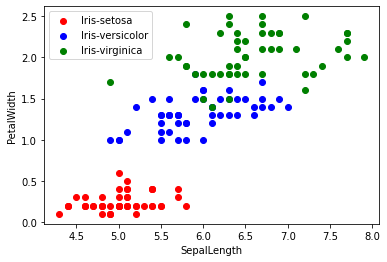

In [18]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'blue', 'green']

for i in range(3):
    x = df[df.Species == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('PetalWidth')
plt.legend()

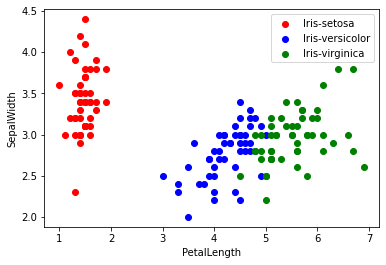

In [19]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'blue', 'green']

for i in range(3):
    x = df[df.Species == species[i]]
    plt.scatter(x['PetalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('PetalLength')
plt.ylabel('SepalWidth')
plt.legend()

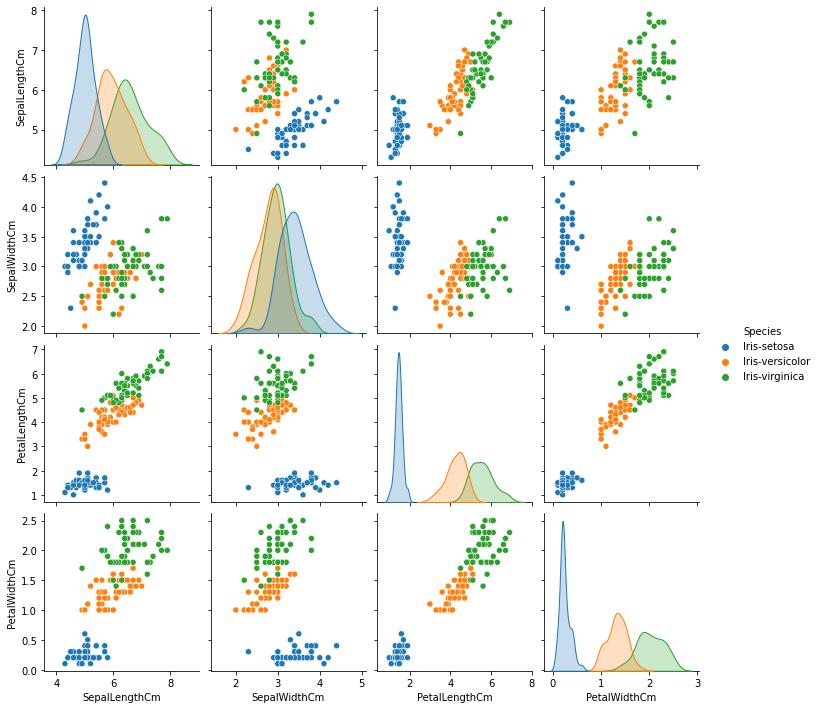

In [20]:
sns.pairplot(df, hue='Species')

using pairplot we'll get all the possible combinations of multivariate analysis as seen above


* correlation matrix - If there are many features in our dataset then, training all the features takes a huge amount of time and it also reduces the accuracy, so in that case we have to reduce the features which are having same correlation

* correlation actually computes which features contribute the most(or which features are most important for the dependent variable) for the target variable

In [21]:
#lets check the correlation matrix

corr = df.corr()
corr

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

<AxesSubplot:>

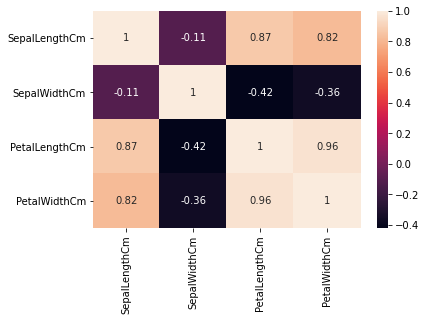

In [22]:
#correlation matrix()
sns.heatmap(corr, annot=True)

So, from this we observe that the petal width and length are highly correlated and the sepal length and width are not highly correlated therefore we can remove any one feature of petals, but as our dataset is small we don't need to that and we will continue with our existing dataset

##  Modelling 

### Label Encoder

Label Encoder converts the labels into numeric form so as to convert it into machine redable form, we're using this because we're having an object target variable column 'SPECIES'

In [23]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#convert into numeric form
df['Species'] = le.fit_transform(df['Species'])

In [24]:
df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

### Splitting the Data

In [25]:
X = df.drop("Species", axis=1)
y = df.Species

In [26]:
X.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# feeding the into the scaler

x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

### Training the data

In [31]:
from sklearn import tree

In [32]:
model = tree.DecisionTreeClassifier(random_state=0, max_depth=2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9555555555555556

### Evaluation of the Model

In [33]:
#importing the evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import cross_val_score

In [34]:
y_preds = model.predict(X_test)

In [35]:
y_preds

array([2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0,
       0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       0])

In [36]:
np.array(y_test)

array([2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0,
       0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       0])

### Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [37]:
k = confusion_matrix(y_test, y_preds)
k

array([[21,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 11]], dtype=int64)

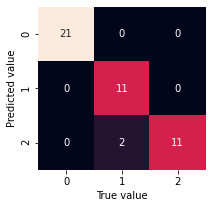

In [38]:
def confusion_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                          annot=True, #annote the boxes
                          cbar=False)
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    
confusion_mat(y_test, y_preds)

More clear representation of confusion matrix

### Classification report

We can create a classification report just by calling classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [39]:
# Show classification report
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        21\n           1       0.85      1.00      0.92        11\n           2       1.00      0.85      0.92        13\n\n    accuracy                           0.96        45\n   macro avg       0.95      0.95      0.94        45\nweighted avg       0.96      0.96      0.96        45\n'

### Conclusion

Thus, We have successfully completed this project and got a good accuracy **DecisonTreeClassifier** of about 95% and also evaluated the model using some metrics

# Thank You